# Data Science - Segmentez des clients d'un site e-commerce

# Auteur : Mme Maty KANE

# Date : le 18 Mars 2025

# __________________________________________________________________________________________

## SOMMAIRE

### [ETAPE 4 : SIMULATION D'UN CONTRAT DE MAINTENANCE](#ETAPE-4-:-SIMULATION-D'UN-CONTRAT-DE-MAINTENANCE)
- [1. Importation des Bibliothèques](#Importation-des-Bibliothèques)
- [2. Importation des données](#Importation-des-données)    
- [3. Préparation des données avec une jointure](#Préparation-des-données-avec-une-jointure)
- [4. Filtrage et transformation des données](#Filtrage-et-transformation-des-données)
- [5. Application de K-Means et calcul de l'ARI](#Application-de-K-Means-et-calcul-de-l'ARI)

# __________________________________________________________________________________________

# ETAPE 4 : SIMULATION D'UN CONTRAT DE MAINTENANCE <a id="ETAPE-4-:-SIMULATION-D'UN-CONTRAT-DE-MAINTENANCE"></a>

# 1. Importation des Bibliothèques <a id="Importation-des-Bibliothèques"></a>

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from dateutil.relativedelta import relativedelta
from sklearn.metrics import adjusted_rand_score
from scipy.stats import ks_2samp

# 2. Importation des données <a id="Importation-des-données"></a>

* **Data_Final** est mon dataset issu de le fusion des 9 tables, nettoyé et transformé. Il contient les variable RFM et d'autres indicateurs de segmentation.

* Pour rappel, lors de l'étape précédente (essais de plusieurs algorithme), nous avions extrait de Data_Final, **data_rfm** (contenant uniquement les 3 variables RFM) et **data_rfm_bis** (contenant les variables RFM et d'autres variables supplémentaires contenues dans Data_Final).
***

* On doit joindre Data_Final avec la table "commandes" (qui contient order_purchase_timestamp), puis filtrer les données sur la période souhaitée.

* Pour ce faire, nous ajouterons la table "customers" à la fusion pour récupérer customer_id, car c’est elle qui fait le lien entre customer_id et customer_unique_id (elle contient customer_id et customer_unique_id).
* Et une fois qu’on aura customer_id, on pourra récupérer order_purchase_timestamp depuis commandes.

**order_purchase_timestamp est la clé pour découper les données dans le temps et suivre l'évolution du clustering.**

In [11]:
# Chargement des données du dataframe de clustering
Data_Final = pd.read_csv("data.csv")
Data_Final

,customer_unique_id,Delais_livraison_jours,Retard_livraison_jours,Delais_dernier_achat_jours,Paiements échelonnés,PrixCommandeMoyen,FraisDeLivraisonMoyen,ScoreCommentaireMoyen,Nombre_de_commande,distance_km_VendeurClient,CoutTotalAvecFraisDeLivraison,Top_Product_Category
0,0000366f3b9a7992bf8c76cfdf3221e2,6,0,291,8,129.90,12.00,5,1,110,141.90,cama_mesa_banho
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3,0,294,1,18.90,8.29,4,1,22,27.19,beleza_saude
2,0000f46a3911fa3c0805444483337064,25,0,716,8,69.00,17.22,3,1,517,86.22,papelaria
3,0000f6ccb0745a6a4b88665a16c9f078,20,0,500,4,25.99,17.63,4,1,2481,43.62,telefonia
4,0004aac84e0df4da2b147fca70cf8255,13,0,468,6,180.00,16.89,5,1,154,196.89,telefonia
...,...,...,...,...,...,...,...,...,...,...,...,...
93344,fffcf5a5ff07b0908bd4e2dbc735a684,27,0,626,10,785.00,248.71,5,2,1996,1033.71,beleza_saude
93345,fffea47cd6d3cc0a88bd621562a9d061,30,0,441,1,64.89,19.69,4,1,1527,84.58,bebes
93346,ffff371b4d645b6ecea244b27531430a,14,0,748,1,89.90,22.56,5,1,1526,112.46,automotivo
93347,ffff5962728ec6157033ef9805bacc48,11,0,299,5,115.00,18.69,5,1,637,133.69,relogios_presentes


In [12]:
# Chargement des données des clients
# customers contient les colonnes customer_id et customer_unique_id
clients = pd.read_csv('olist_customers_dataset.csv')
clients

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [13]:
# Chargement des données des commandes
commandes = pd.read_csv('olist_orders_dataset.csv')
commandes

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [14]:
# Filtrage uniquement des commandes livrées
commandes = commandes[commandes['order_status'] == 'delivered']

# 3. Préparation des données avec une jointure <a id="Préparation-des-données-avec-une-jointure"></a>
Il faut fusionner Data_Final avec clients et commandes, afin de récupèrer "order_purchase_timestamp".

In [16]:
# Jointure avec clients pour récupérer customer_id
df_fusionne = Data_Final.merge(clients[['customer_unique_id', 'customer_id']], 
                               on="customer_unique_id", how="left")

# Sélection de la dernière commande par customer_id
dernieres_commandes = commandes.sort_values(by="order_purchase_timestamp").drop_duplicates(subset="customer_id", keep="last")

# Jointure avec commandes pour récupérer order_purchase_timestamp
df_fusionne = df_fusionne.merge(dernieres_commandes[['customer_id', 'order_purchase_timestamp']], 
                                on="customer_id", how="left")

# Suppression des doublons pour garder un seul customer_unique_id par ligne
df_fusionne = df_fusionne.drop_duplicates(subset="customer_unique_id", keep="first")

# Vérification
print("Taille finale de df_fusionne :", df_fusionne.shape)
print("Valeurs nulles dans order_purchase_timestamp :", df_fusionne['order_purchase_timestamp'].isna().sum())
print("Nb de customer_unique_id distincts :", df_fusionne['customer_unique_id'].nunique())

Taille finale de df_fusionne : (93349, 14)
Valeurs nulles dans order_purchase_timestamp : 95
Nb de customer_unique_id distincts : 93349


In [17]:
df_fusionne

,customer_unique_id,Delais_livraison_jours,Retard_livraison_jours,Delais_dernier_achat_jours,Paiements échelonnés,PrixCommandeMoyen,FraisDeLivraisonMoyen,ScoreCommentaireMoyen,Nombre_de_commande,distance_km_VendeurClient,CoutTotalAvecFraisDeLivraison,Top_Product_Category,customer_id,order_purchase_timestamp
0,0000366f3b9a7992bf8c76cfdf3221e2,6,0,291,8,129.90,12.00,5,1,110,141.90,cama_mesa_banho,fadbb3709178fc513abc1b2670aa1ad2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3,0,294,1,18.90,8.29,4,1,22,27.19,beleza_saude,4cb282e167ae9234755102258dd52ee8,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,25,0,716,8,69.00,17.22,3,1,517,86.22,papelaria,9b3932a6253894a02c1df9d19004239f,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,20,0,500,4,25.99,17.63,4,1,2481,43.62,telefonia,914991f0c02ef0843c0e7010c819d642,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,13,0,468,6,180.00,16.89,5,1,154,196.89,telefonia,47227568b10f5f58a524a75507e6992c,2017-11-14 19:45:42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96669,fffcf5a5ff07b0908bd4e2dbc735a684,27,0,626,10,785.00,248.71,5,2,1996,1033.71,beleza_saude,74be082247cd677a147d83ee670e9d53,2017-06-08 21:00:36
96670,fffea47cd6d3cc0a88bd621562a9d061,30,0,441,1,64.89,19.69,4,1,1527,84.58,bebes,0ecf8e0a08148af0bf313184f167670a,2017-12-10 20:07:56
96671,ffff371b4d645b6ecea244b27531430a,14,0,748,1,89.90,22.56,5,1,1526,112.46,automotivo,27f584b0f1dc4e610065c240f68b6be0,2017-02-07 15:49:16
96672,ffff5962728ec6157033ef9805bacc48,11,0,299,5,115.00,18.69,5,1,637,133.69,relogios_presentes,832a3b0254347d409512ae92eaf154a6,2018-05-02 15:17:41


Maintenant, df_fusionne contient bien order_purchase_timestamp pour chaque client.

In [19]:
df_fusionne.drop_duplicates(inplace=True)

### **Vérification des valeurs manquantes**

In [21]:
# Nombre de valeurs différentes par colonne
print(df_fusionne.isnull().sum())

customer_unique_id                0
Delais_livraison_jours            0
Retard_livraison_jours            0
Delais_dernier_achat_jours        0
Paiements échelonnés              0
PrixCommandeMoyen                 0
FraisDeLivraisonMoyen             0
ScoreCommentaireMoyen             0
Nombre_de_commande                0
distance_km_VendeurClient         0
CoutTotalAvecFraisDeLivraison     0
Top_Product_Category              0
customer_id                       0
order_purchase_timestamp         95
dtype: int64


# 4. Filtrage et transformation des données <a id="Filtrage-et-transformation-des-données"></a>

In [23]:
import pandas as pd
import numpy as np

# Suppression des lignes où 'order_purchase_timestamp' est NaN
df_fusionne = df_fusionne.dropna(subset=['order_purchase_timestamp'])

# Conversion en datetime
df_fusionne = df_fusionne.copy()
df_fusionne['order_purchase_timestamp'] = pd.to_datetime(df_fusionne['order_purchase_timestamp'])

# Création d'un dataframe df_simulation à partir de df_fusionne avec les variables pertinentes
df_simulation = df_fusionne[['Delais_livraison_jours', 'Delais_dernier_achat_jours', 
                             'ScoreCommentaireMoyen', 'Nombre_de_commande', 
                             'CoutTotalAvecFraisDeLivraison', 'order_purchase_timestamp']]

In [24]:
df_simulation.head()

,Delais_livraison_jours,Delais_dernier_achat_jours,ScoreCommentaireMoyen,Nombre_de_commande,CoutTotalAvecFraisDeLivraison,order_purchase_timestamp
0,6,291,5,1,141.90,2018-05-10 10:56:27
1,3,294,4,1,27.19,2018-05-07 11:11:27
2,25,716,3,1,86.22,2017-03-10 21:05:03
3,20,500,4,1,43.62,2017-10-12 20:29:41
4,13,468,5,1,196.89,2017-11-14 19:45:42


# 5. Application de K-Means et calcul de l'ARI <a id="Application-de-K-Means-et-calcul-de-l'ARI"></a>

* Nous allons analyser l'évolution de la stabilité des clusters sur une période de 12 mois avec des intervalles de 15 jours à partir du **31 décembre 2017 (T0)**, en suivant les étapes ci-dessus : 
    * Choix des périodes de 0, 15, 30, ..., 285 jours à partir de la date T0.
    * Application  du clustering à T0 puis comparaison avec les périodes suivantes.
    * Utilisation de l'Adjusted Rand Index (ARI) pour mesurer la stabilité des clusters et du test de Kolmogorov-Smirnov pour vérifier la divergence des distributions des features.

* **Plage de données :**
    * **Début des commandes : 15 septembre 2016**
    * **Fin des commandes : 29 août 2018**

*Nous avons des données sur les comportements des clients qui s'étendent sur environ **deux ans**, ce qui est une période suffisamment longue pour observer des tendances saisonnières et des comportements d'achat variés.
**Le choix du 31 décembre 2017 comme T0 repose sur plusieurs considérations :***
***
* Nous avons souhaité maximiser la période d'analyse :
    * **Si T0 est trop proche de la fin des données (ex: mi-2018)**, la période d'observation sera courte.
    * **Si T0 est trop tôt (ex: 2016)**, on risque de ne pas capturer suffisamment de variations récentes.
    * **Décembre 2017** permettra d'observer l'évolution du clustering sur près de 8 mois (jusqu'à août 2018).
***
* Nous avons pris en compte la saisonnalité des ventes :
    * Le mois de décembre inclut des événements majeurs comme Noël et les fêtes de fin d'année, qui influencent fortement le comportement d'achat.
    * En prenant T0 après cette période, on évite d'avoir une segmentation biaisée par un pic saisonnier extrême.
    * Cela permet aussi d'observer comment les segments évoluent après un pic de consommation.
***
* Et enfin 2018 parait idéal pour la stabilité et la disponibilité des données
    * À partir de 2018, il est possible que certaines tendances se stabilisent après la croissance initiale d'Olist.
    * Cela facilite une meilleure comparaison des segments entre les périodes.

In [27]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Définition de T0 comme le 31 décembre 2017
date_t0 = np.datetime64("2017-12-31 00:00:00")

# Périodes à tester : 0, 15, 30, ..., 285 jours après T0
intervals = list(range(0, 301, 15))  # Périodes de 0 à 285 jours avec un pas de 15 jours

# Sélection des features pertinentes
target_features = ['Delais_livraison_jours', 'Delais_dernier_achat_jours', 'ScoreCommentaireMoyen',
                   'Nombre_de_commande', 'CoutTotalAvecFraisDeLivraison']

# Filtre des données pour T0
df_t0_period = df_simulation[df_simulation['order_purchase_timestamp'] <= date_t0].copy()
features_t0 = df_t0_period[target_features]

# Standardisation des features
scaler = StandardScaler()
features_t0_scaled = scaler.fit_transform(features_t0)

# Application du clustering sur T0
kmeans_t0 = KMeans(n_clusters=6, random_state=42, n_init=10)
df_t0_period['Cluster'] = kmeans_t0.fit_predict(features_t0_scaled)
labels_t0 = df_t0_period['Cluster']

# Initialisation d'une liste pour stocker les résultats ARI
ari_results = []
ks_results = {feature: [] for feature in target_features}

# Boucle sur les différentes périodes pour comparer les clusters
for days in intervals:
    date_t = date_t0 + np.timedelta64(days, 'D')
    df_period = df_simulation[df_simulation['order_purchase_timestamp'] <= date_t].copy()
    features_period = df_period[target_features]
    
    # Standardisation des features pour cette période
    features_period = features_period.clip(lower=features_t0.min(), upper=features_t0.max(), axis=1)
    features_period_scaled = scaler.transform(features_period)
    
    # Application de K-Means sur la nouvelle période
    kmeans_t = KMeans(n_clusters=6, random_state=42, n_init=10)
    df_period['Cluster'] = kmeans_t.fit_predict(features_period_scaled)
    labels_period = df_period['Cluster']
    
    
    # Calcul de l'ARI (comparaison des clusters sur les mêmes clients)
    common_index = df_period.index.intersection(df_t0_period.index)
    if not common_index.empty:
        ari_score = adjusted_rand_score(labels_t0.loc[common_index], labels_period.loc[common_index])
        ari_results.append((days, ari_score))
    else:
        ari_results.append((days, np.nan))
        
    # seuil pour décider quand réentraîner le modèle.
    if ari_score < 0.5:
        print(f" Alerte : ARI faible ({ari_score:.2f}) après {days} jours. Il faut envisager un réentraînement du modèle.")

    
    # Test de Kolmogorov-Smirnov pour les features
    for feature in target_features:
        ks_stat, p_value = ks_2samp(df_t0_period[feature], df_period[feature])
        ks_results[feature].append((days, ks_stat, p_value))

# Conversion des résultats en dataframe
ari_df = pd.DataFrame(ari_results, columns=['Jours après T0', 'ARI'])
ks_df = pd.DataFrame([{"Jours après T0": days, "Feature": feature, "KS Stat": stat, "P-value": pval}
                      for feature, results in ks_results.items() for days, stat, pval in results])

 Alerte : ARI faible (0.46) après 135 jours. Il faut envisager un réentraînement du modèle.
 Alerte : ARI faible (0.42) après 150 jours. Il faut envisager un réentraînement du modèle.
 Alerte : ARI faible (0.39) après 165 jours. Il faut envisager un réentraînement du modèle.
 Alerte : ARI faible (0.37) après 180 jours. Il faut envisager un réentraînement du modèle.


### **Visualisation de l'ARI**

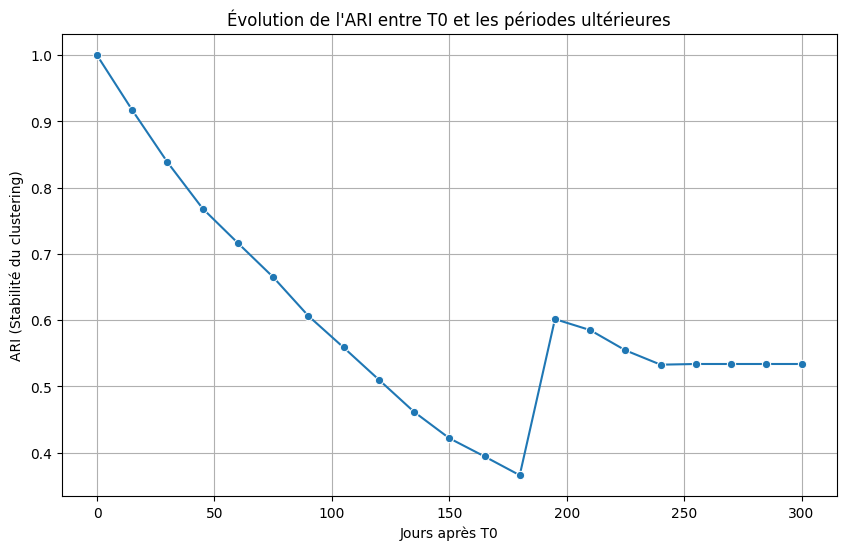

Résultats ARI:
    Jours après T0       ARI
0                0  1.000000
1               15  0.917140
2               30  0.838449
3               45  0.768507
4               60  0.716453
5               75  0.665073
6               90  0.606482
7              105  0.558810
8              120  0.510248
9              135  0.461650
10             150  0.421866
11             165  0.394347
12             180  0.365993
13             195  0.601660
14             210  0.585041
15             225  0.554535
16             240  0.532865
17             255  0.533901
18             270  0.533901
19             285  0.533901
20             300  0.533901


In [29]:
# Visualisation de l'ARI
plt.figure(figsize=(10, 6))
sns.lineplot(data=ari_df, x='Jours après T0', y='ARI', marker='o')
plt.title("Évolution de l'ARI entre T0 et les périodes ultérieures")
plt.xlabel("Jours après T0")
plt.ylabel("ARI (Stabilité du clustering)")

# Ajout d'une grille pour améliorer la lisibilité
plt.grid(True)

plt.show()


# Affichage des résultats
print("Résultats ARI:")
print(ari_df)

### **Visualisation des tests KS**

 Alerte : Distribution de CoutTotalAvecFraisDeLivraison a significativement changé après 300 jours (p=0.001)


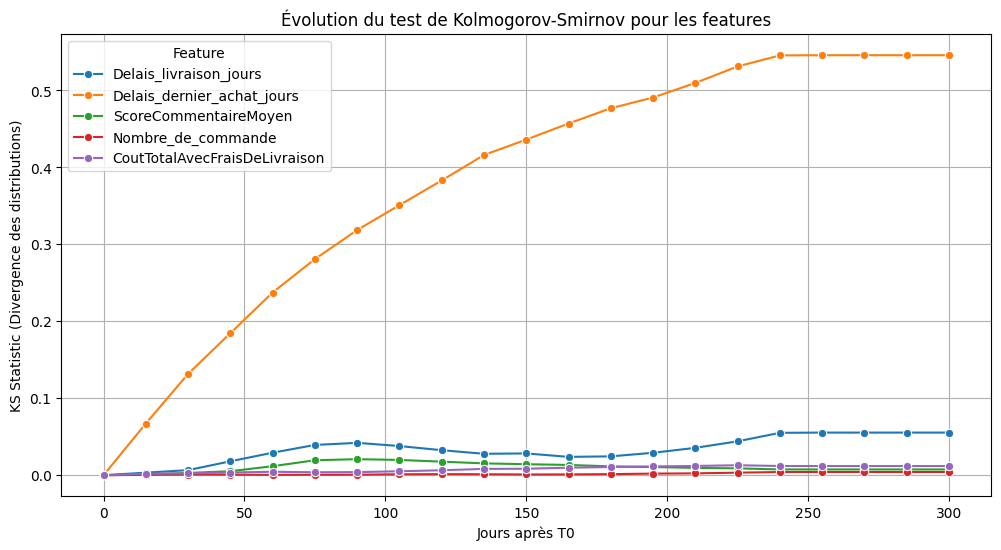


Résultats du test de Kolmogorov-Smirnov:
     Jours après T0                        Feature   KS Stat       P-value
0                 0         Delais_livraison_jours  0.000000  1.000000e+00
1                15         Delais_livraison_jours  0.003349  9.673329e-01
2                30         Delais_livraison_jours  0.006602  2.802410e-01
3                45         Delais_livraison_jours  0.018077  5.386585e-07
4                60         Delais_livraison_jours  0.029250  3.841280e-18
..              ...                            ...       ...           ...
100             240  CoutTotalAvecFraisDeLivraison  0.011989  4.849967e-04
101             255  CoutTotalAvecFraisDeLivraison  0.011906  5.435822e-04
102             270  CoutTotalAvecFraisDeLivraison  0.011906  5.435822e-04
103             285  CoutTotalAvecFraisDeLivraison  0.011906  5.435822e-04
104             300  CoutTotalAvecFraisDeLivraison  0.011906  5.435822e-04

[105 rows x 4 columns]


In [31]:
#  Ajout d'une alerte si p-value < 0.05, ce qui signifie que la distribution a significativement changé.
for feature in target_features:
    ks_stat, p_value = ks_2samp(df_t0_period[feature], df_period[feature])
    ks_results[feature].append((days, ks_stat, p_value))
    
if p_value < 0.05:
    print(f" Alerte : Distribution de {feature} a significativement changé après {days} jours (p={p_value:.3f})")


# Visualisation des tests KS
plt.figure(figsize=(12, 6))
sns.lineplot(data=ks_df, x='Jours après T0', y='KS Stat', hue='Feature', marker='o')
plt.title("Évolution du test de Kolmogorov-Smirnov pour les features")
plt.xlabel("Jours après T0")
plt.ylabel("KS Statistic (Divergence des distributions)")
plt.legend(title='Feature')

# Ajout d'une grille pour améliorer la lisibilité
plt.grid(True)

plt.show()

# Affichage des résultats KS
print("\nRésultats du test de Kolmogorov-Smirnov:")
print(ks_df)

Ce test statistique vérifie si deux distributions sont significativement différentes.

Si la différence est trop grande, cela signifie que les segments ont changé et qu’un ré-entraînement est nécessaire.

Ce test nous dit si la distribution d’une feature a significativement changé entre le début et la fin de l’année.

Si p-value < 0.05, alors la distribution a changé de manière significative.